# Polynomial Regression


## Import the dataset

In [153]:
import numpy as np
import pandas as pd
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


# Creating another dataset to analyse

In [154]:
d2 = pd.DataFrame()
d2['Level'], d2['Salary'] = dataset['Level'], dataset['Salary']
d2.head() # Here created another dataset of previous one so we don't gonna touch original one

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


In [155]:
x = dataset['Level'].values # extracting level into the x
y = dataset['Salary'].values # extracting Salary into the y

In [156]:
# print(x)
x = x.reshape(-1,1) # reshape will suggest number of columns or row
# print(x)

# Spliting the data between test and train

In [157]:
from sklearn.model_selection import train_test_split
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

# Fitting the Polynomial Regression to dataset

In [158]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [159]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=4) # specified order of the polynomialRegression (used degree of freedom)
X_pl = pr.fit_transform(x) # Transforming x values in another dataset


# Creating Linear Regression object for model 

In [160]:
from sklearn.linear_model import LinearRegression
lnr = LinearRegression()
lnr.fit(X_pl,y)
lnr.score(X_pl,y) # This is model accuracy

0.9973922891706614

# Prediction of data

In [161]:
Y_pl = lnr.predict(X_pl) # Here predict dataset
Y_pl

array([ 53356.64335673,  31759.90675989,  58642.19114214,  94632.86713283,
       121724.94172492, 143275.05827504, 184003.49650348, 289994.17249416,
       528694.63869465, 988916.08391617])

In [162]:
y_test

array([ 60000, 500000, 110000], dtype=int64)

# Graph between Level and Salary

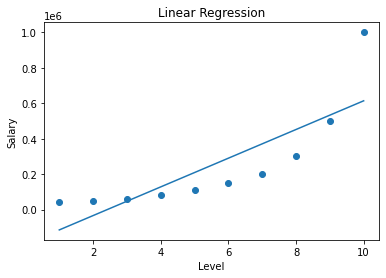

In [163]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.plot(x,lr.predict(x))
plt.title("Linear Regression")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

# Visualization of model


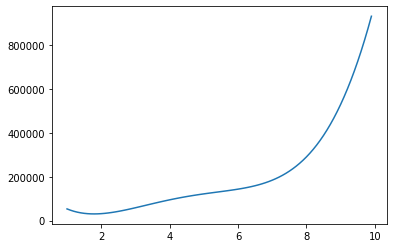

In [164]:
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.plot(x_grid,lnr.predict(pr.fit_transform(x_grid)))

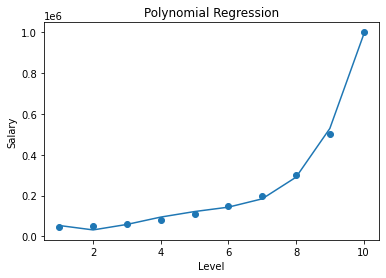

In [165]:
# x_grid = np.arange(min(x), max(x), 0.1)
# x_grid = x_grid.reshape((len(x_grid), 1))
# plt.plot(x_grid,lnr.predict(pr.fit_transform(x_grid)))
plt.scatter(x,y)
plt.plot(x,Y_pl)
plt.title("Polynomial Regression")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()